Sources: 

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html (census tracts and state shapefiles)

https://msl.mt.gov/geoinfo/msdi/climate/

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

Montana State Border

EPSG:4269


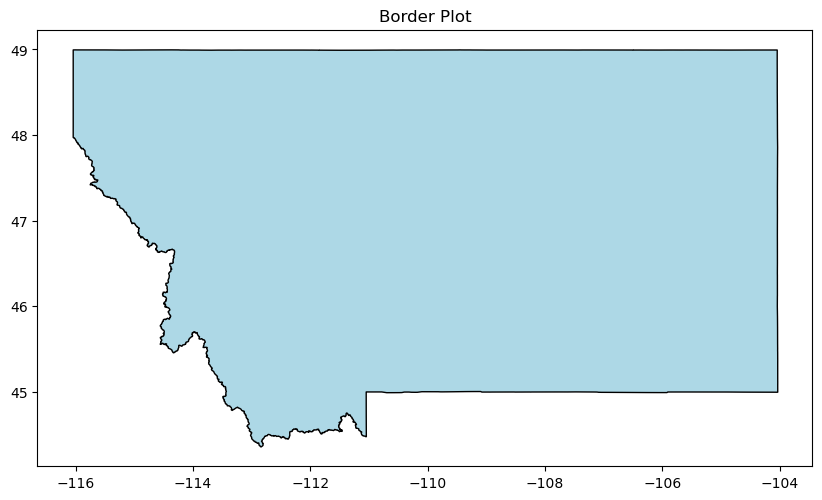

In [18]:
shapefile_path = 'data\state\state\montana_border.shp'
montana_gdf = gpd.read_file(shapefile_path)

print(montana_gdf.crs)
montana_gdf.plot(figsize=(10, 10), edgecolor='black', color='lightblue')

plt.title('Border Plot')
plt.show()

C:\Users\Alex\AppData\Local\Temp\ipykernel_36352\986618593.py:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\Alex\AppData\Local\Temp\ipykernel_36352\986618593.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


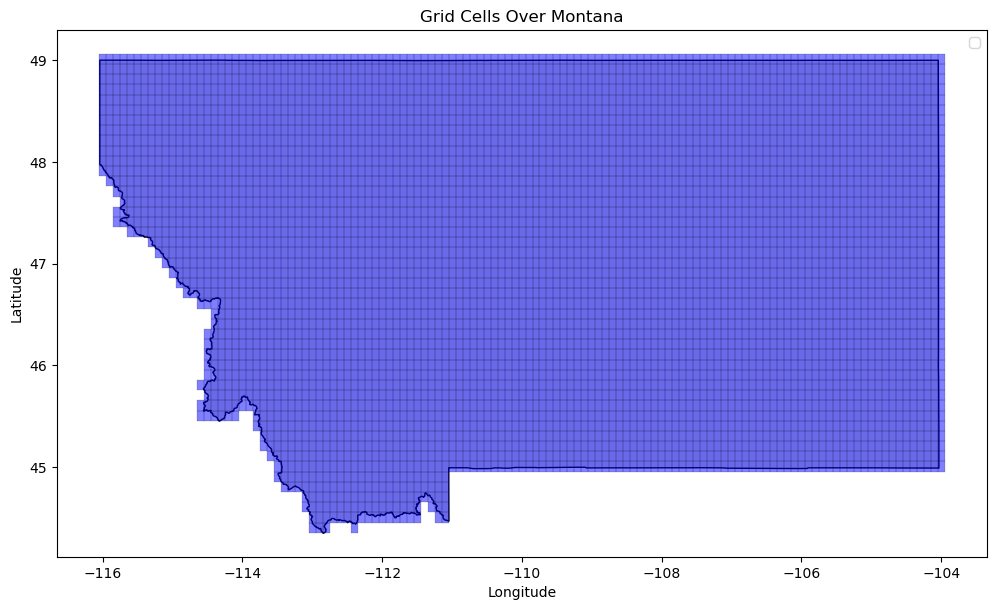

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# Step 2: Define grid properties
minx, miny, maxx, maxy = montana_gdf.total_bounds
grid_size = 0.1  # Size of each grid cell

# Step 3: Create a GeoDataFrame with cell geometries
cell_data = []
cell_id = 1  # Initialize cell ID

x = minx
while x < maxx:
    y = miny
    while y < maxy:
        cell_geom = box(x, y, x + grid_size, y + grid_size)  # Create a rectangle for each grid cell
        if montana_gdf.intersects(cell_geom).any():  # Check if the cell intersects with Montana
            cell_data.append({'cell_id': cell_id, 'geometry': cell_geom})
            cell_id += 1
        y += grid_size
    x += grid_size

# Step 4: Convert to a GeoDataFrame
montana_grid_gdf = gpd.GeoDataFrame(cell_data, crs=montana_gdf.crs)

# Step 5: Plot the grid cells
fig, ax = plt.subplots(figsize=(12, 10))
montana_gdf.plot(ax=ax, color='lightgray', edgecolor='black')  # Plot Montana's boundary
montana_grid_gdf.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black', linewidth=0.2, label='Grid Cells')

# Customizing the plot
plt.title('Grid Cells Over Montana')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [20]:
print("length:", len(montana_grid_gdf))
print("crs:", montana_grid_gdf.crs)
montana_grid_gdf

length: 4705
crs: EPSG:4269


,cell_id,geometry
0,1,"POLYGON ((-115.94916 47.85796, -115.94916 47.9..."
1,2,"POLYGON ((-115.94916 47.95796, -115.94916 48.0..."
2,3,"POLYGON ((-115.94916 48.05796, -115.94916 48.1..."
3,4,"POLYGON ((-115.94916 48.15796, -115.94916 48.2..."
4,5,"POLYGON ((-115.94916 48.25796, -115.94916 48.3..."
...,...,...
4700,4701,"POLYGON ((-103.94916 48.55796, -103.94916 48.6..."
4701,4702,"POLYGON ((-103.94916 48.65796, -103.94916 48.7..."
4702,4703,"POLYGON ((-103.94916 48.75796, -103.94916 48.8..."
4703,4704,"POLYGON ((-103.94916 48.85796, -103.94916 48.9..."


Montana Census Tracts

EPSG:4269


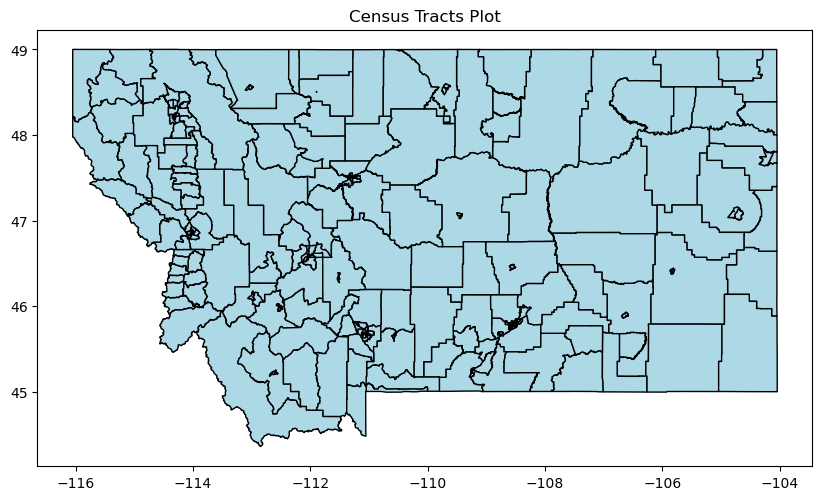

In [21]:
shapefile_path = 'data\\state\\tracts\\cb_2018_30_tract_500k.shp'
tract_gdf = gpd.read_file(shapefile_path)

print(tract_gdf.crs)
tract_gdf.plot(figsize=(10, 10), edgecolor='black', color='lightblue')

plt.title('Census Tracts Plot')
plt.show()


In [22]:
tract_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,30,029,001000,1400000US30029001000,30029001000,10,CT,1435972,0,"POLYGON ((-114.32435 48.20063, -114.31508 48.2..."
1,30,031,000501,1400000US30031000501,30031000501,5.01,CT,425163655,282061,"POLYGON ((-111.07460 45.57965, -111.07332 45.5..."
2,30,031,000701,1400000US30031000701,30031000701,7.01,CT,2597620,0,"POLYGON ((-111.06192 45.68575, -111.05300 45.6..."
3,30,035,980000,1400000US30035980000,30035980000,9800,CT,1470091631,43198434,"POLYGON ((-114.06818 48.99892, -114.05919 48.9..."
4,30,043,962202,1400000US30043962202,30043962202,9622.02,CT,2323216244,456125,"POLYGON ((-112.59794 46.23689, -112.59499 46.2..."


Water Index

In [23]:
shapefile_path = 'data\water\PrincipalAquifers_MT.shp'
gdf = gpd.read_file(shapefile_path)

gdf = gdf.to_crs(epsg=4269)


In [24]:
gdf

,COUNT,FID_1,HG_Code,ID,HG_ID,MT_500_hg,hg_name,hg_age,hg_type,ObjectID,Shape_Leng,Shape_Le_1,Shape_Area,hg_desc,geometry
0,7.0,3,Kkotn,8.0,9.0,Kkotn,Cretaceous Kootenai Aquifer,Lower Cretaceous,"Unconfined near outcrop areas, confined at depth.",9,9.943657e+06,9.943657e+06,5.420636e+09,Central Montana in foothills and mountain rang...,"MULTIPOLYGON (((-111.19056 45.22779, -111.1899..."
1,1.0,15,W,0.0,15.0,W,Water,NaN,NaN,15,3.297292e+06,3.297292e+06,2.067235e+09,"Includes waterbodies: rivers, streams, lakes, ...","MULTIPOLYGON (((-111.30608 44.84238, -111.3058..."
2,56.0,13,TKig,3.0,4.0,TKig,Tertiary and Cretaceous Igneous Fractured-rock...,Tertiary and Cretaceous,"Unconfined near outcrop areas, confined at depth.",4,1.630037e+07,1.630037e+07,2.268588e+10,Southwestern Montana and Bears Paw and Little ...,"MULTIPOLYGON (((-110.66634 45.04621, -110.6684..."
3,58.0,8,pCfb,0.0,14.0,pCfb,Precambrian Fractured-rock Aquifers,Precambrian,"Unconfined near outcrop areas, confined at depth.",14,1.994289e+07,1.994289e+07,5.844723e+10,Western Montana. Includes meta-sediments of th...,"MULTIPOLYGON (((-111.05062 46.45031, -111.0520..."
4,19.0,9,Pzl,12.0,13.0,Pzl,Lower Paleozoic Aquifers,Paleozoic,"Unconfined near outcrop areas, confined at depth.",13,9.346164e+06,9.409541e+06,4.106686e+09,"Includes the Jefferson, Three Forks, Bighorn, ...","MULTIPOLYGON (((-107.72204 45.02308, -107.7228..."
5,3.0,2,Kjr,5.0,6.0,Kjr,Cretaceous Judith River Aquifer,Upper Cretaceous,"Unconfined near outcrop areas, confined at depth.",6,2.093990e+07,2.093990e+07,1.866315e+10,North central Montana. Consolidated sandy shal...,"MULTIPOLYGON (((-107.99036 47.07861, -107.9874..."
6,11.0,6,Mmdsn,11.0,12.0,Mmdsn,Mississippian Madison Aquifer,Mississippian,"Unconfined near outcrop areas, confined at depth.",12,1.141260e+07,1.141260e+07,6.730074e+09,Central Montana in foothills and mountain rang...,"MULTIPOLYGON (((-111.02682 45.97639, -111.0258..."
7,8.0,4,Klvgs,9.0,10.0,Klvgs,Cretaceous Livingston Group Aquifer,Upper Cretaceous,"Unconfined near outcrop areas, confined at depth.",10,1.031899e+06,1.031899e+06,1.217031e+09,"Inclues the Hoppers, Billman Creeek, Miner Cre...","MULTIPOLYGON (((-110.80046 46.28736, -110.8001..."
8,8.0,0,Kegle,6.0,7.0,Kegle,Cretaceous Eagle Aquifer,Upper Cretaceous,"Unconfined near outcrop areas, confined at depth.",7,1.397223e+07,1.397223e+07,1.004111e+10,Central and south central Montana. includes ba...,"MULTIPOLYGON (((-110.67740 45.02961, -110.6766..."
9,8.0,1,Kfhhc,4.0,5.0,Kfhhc,Cretaceous Fox Hills-Hell Creek Aquifer,Upper Cretaceous,"Unconfined near outcrop areas, confined at depth.",5,3.046147e+07,3.046147e+07,2.183300e+10,Eastern Montana. Includes Lance Formation. San...,"MULTIPOLYGON (((-104.84851 45.45542, -104.8476..."


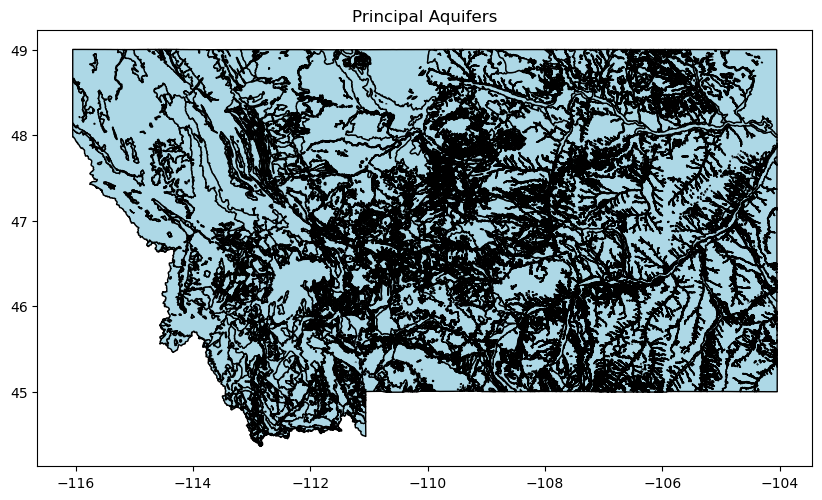

In [25]:
gdf.plot(figsize=(10, 10), edgecolor='black', color='lightblue')

plt.title('Principal Aquifers')
plt.show()

    COUNT  FID_1 HG_Code   ID  HG_ID MT_500_hg  \
13    9.0     11      Qs  1.0    1.0        Qs   

                                      hg_name                   hg_age  \
13  Cenozoic Basin Fill and Alluvium Aquifers  Quaternary and Tertiary   

                                              hg_type  ObjectID    Shape_Leng  \
13  In western Montana: Unconfined surficial aquif...         1  9.108728e+07   

      Shape_Le_1    Shape_Area  \
13  9.108728e+07  4.765351e+10   

                                              hg_desc  \
13  Basin-fill aquifers: Western Montana intermont...   

                                             geometry  
13  MULTIPOLYGON (((-112.15645 44.57744, -112.1566...  


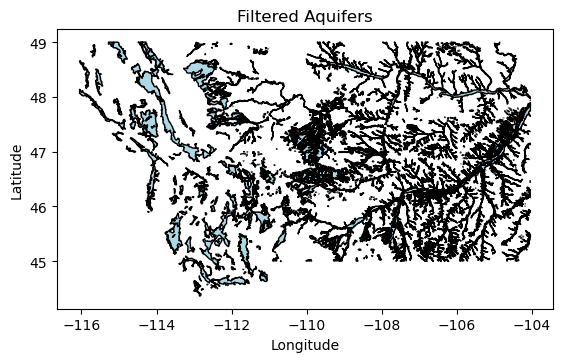

In [26]:
import geopandas as gpd

# Load your GeoDataFrame (assume it's already created)
# gdf = gpd.read_file("your_file_path.shp")  # Example of loading a GeoDataFrame

# Apply the filtering logic
filtered_gdf = gdf[
    (gdf["hg_name"] != 'Water') &
    (gdf["hg_desc"] != 'Includes waterbodies: rivers, streams, lakes, reservoirs, canals, etc.') &
    (gdf["hg_type"] == 'In western Montana: Unconfined surficial aquifers with semi-confined to confined aquifers in deep basin-fill. In eastern Montana: generally unconfined.')
]

# Print the resulting filtered GeoDataFrame
print(filtered_gdf)

# Optionally, you can plot the filtered results
filtered_gdf.plot(color='lightblue', edgecolor='black')
plt.title('Filtered Aquifers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [27]:
filtered_gdf


,COUNT,FID_1,HG_Code,ID,HG_ID,MT_500_hg,hg_name,hg_age,hg_type,ObjectID,Shape_Leng,Shape_Le_1,Shape_Area,hg_desc,geometry
13,9.0,11,Qs,1.0,1.0,Qs,Cenozoic Basin Fill and Alluvium Aquifers,Quaternary and Tertiary,In western Montana: Unconfined surficial aquif...,1,9.108728e+07,9.108728e+07,4.765351e+10,Basin-fill aquifers: Western Montana intermont...,"MULTIPOLYGON (((-112.15645 44.57744, -112.1566..."


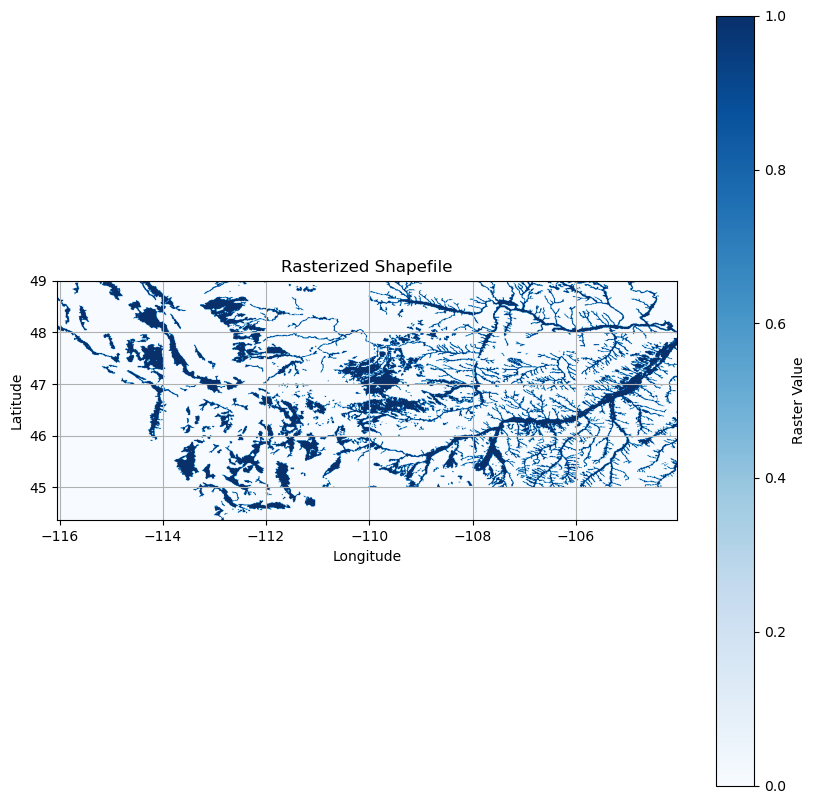

In [28]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin
import matplotlib.pyplot as plt
import numpy as np



# Define the grid resolution
grid_size = 0.01
# Get bounds of the geometries
minx, miny, maxx, maxy = filtered_gdf.total_bounds

# Create the transform for the raster
transform = from_origin(minx, maxy, grid_size, grid_size)  # top-left corner, x and y resolution

# Calculate the shape of the raster (number of rows and columns)
width = int((maxx - minx) / grid_size)
height = int((maxy - miny) / grid_size)

# Create an empty raster
# Assuming you have already defined your transform and dimensions
water_raster = rasterize(
    [(geom, 1) for geom in filtered_gdf.geometry],  # Using 1 for the water areas
    out_shape=(height, width),  # Specify the output shape
    transform=transform,
    fill=0,  # Fill value
    all_touched=True  # Include all touched pixels
)


# Plot the raster
plt.figure(figsize=(10, 10))
plt.imshow(water_raster, cmap='Blues', extent=(minx, maxx, miny, maxy))
plt.colorbar(label='Raster Value')
plt.title('Rasterized Shapefile')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


In [29]:
print(type(water_raster))
water_raster

<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
import pandas as pd
import numpy as np
import rasterio

water_raster
latitudes = []
longitudes = []
values = []

# Iterate over the raster array
rows, cols = water_raster.shape
for row in range(rows):
    for col in range(cols):
        value = water_raster[row, col]
        if value > 0:  # Only keep values greater than 0
            # Get the coordinates using the transform
            lon, lat = transform * (col, row)  # Convert column/row to lon/lat
            latitudes.append(lat)
            longitudes.append(lon)
            values.append(value)

# Create a DataFrame
water_df = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'value': values
})

# Check if the DataFrame is empty
if water_df.empty:
    print("No valid data found. Check your raster input and processing steps.")
else:
    # Display the DataFrame
    print(water_df)



         latitude   longitude  value
0       49.001389 -115.289364      1
1       49.001389 -115.279364      1
2       49.001389 -115.269364      1
3       49.001389 -115.259364      1
4       49.001389 -115.249364      1
...           ...         ...    ...
106526  44.371389 -112.869364      1
106527  44.371389 -112.859364      1
106528  44.371389 -112.849364      1
106529  44.371389 -112.839364      1
106530  44.371389 -112.829364      1

[106531 rows x 3 columns]


In [31]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming water_df has 'lon' and 'lat' columns
# Create a geometry column from longitude and latitude
geometry = [Point(xy) for xy in zip(water_df['longitude'], water_df['latitude'])]

# Create a GeoDataFrame
water_gdf = gpd.GeoDataFrame(water_df, geometry=geometry)

# Set the coordinate reference system (CRS) if needed, e.g., WGS84
water_gdf.set_crs(epsg=4326, inplace=True)  # or whatever CRS you are using

# Now you can use water_gdf as a GeoDataFrame
print(water_gdf)



         latitude   longitude  value                     geometry
0       49.001389 -115.289364      1  POINT (-115.28936 49.00139)
1       49.001389 -115.279364      1  POINT (-115.27936 49.00139)
2       49.001389 -115.269364      1  POINT (-115.26936 49.00139)
3       49.001389 -115.259364      1  POINT (-115.25936 49.00139)
4       49.001389 -115.249364      1  POINT (-115.24936 49.00139)
...           ...         ...    ...                          ...
106526  44.371389 -112.869364      1  POINT (-112.86936 44.37139)
106527  44.371389 -112.859364      1  POINT (-112.85936 44.37139)
106528  44.371389 -112.849364      1  POINT (-112.84936 44.37139)
106529  44.371389 -112.839364      1  POINT (-112.83936 44.37139)
106530  44.371389 -112.829364      1  POINT (-112.82936 44.37139)

[106531 rows x 4 columns]


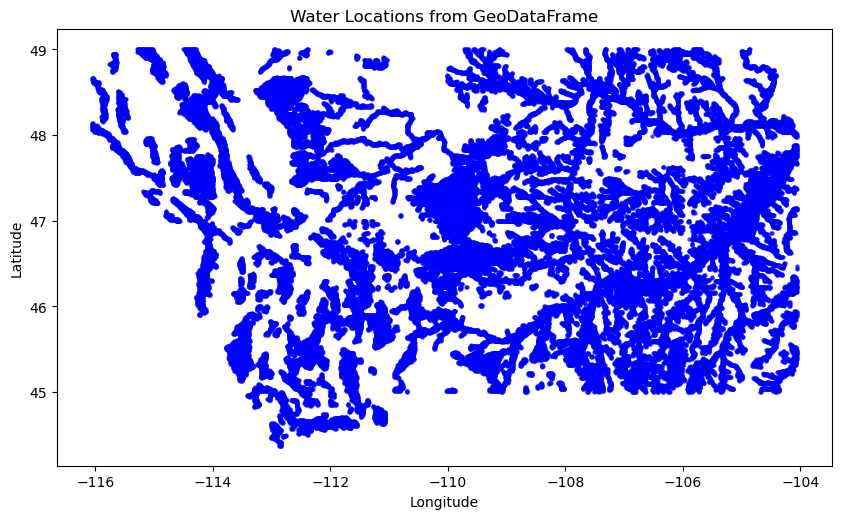

In [32]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
water_gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.6)  # Adjust color, size, and transparency as needed

# Add title and labels
plt.title("Water Locations from GeoDataFrame")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


In [33]:
water_gdf

,latitude,longitude,value,geometry
0,49.001389,-115.289364,1,POINT (-115.28936 49.00139)
1,49.001389,-115.279364,1,POINT (-115.27936 49.00139)
2,49.001389,-115.269364,1,POINT (-115.26936 49.00139)
3,49.001389,-115.259364,1,POINT (-115.25936 49.00139)
4,49.001389,-115.249364,1,POINT (-115.24936 49.00139)
...,...,...,...,...
106526,44.371389,-112.869364,1,POINT (-112.86936 44.37139)
106527,44.371389,-112.859364,1,POINT (-112.85936 44.37139)
106528,44.371389,-112.849364,1,POINT (-112.84936 44.37139)
106529,44.371389,-112.839364,1,POINT (-112.83936 44.37139)


NDVI Index

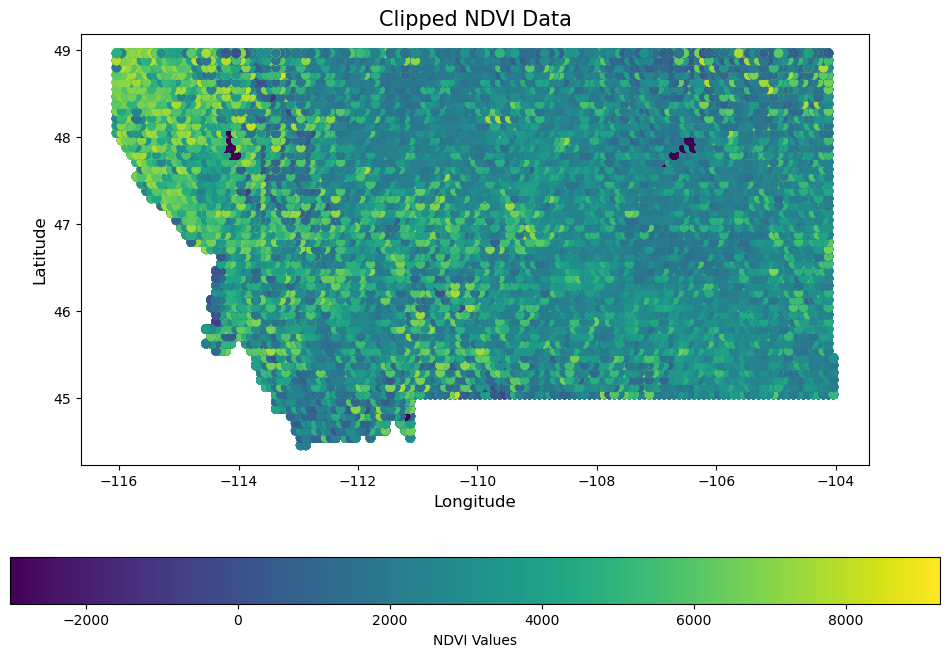

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the clipped GeoJSON file
clipped_ndvi = gpd.read_file('clipped_ndvi.geojson')

# Step 2: Create a plot
fig, ax = plt.subplots(figsize=(12, 8))

# Step 3: Plot the clipped NDVI data using the Viridis colormap
clipped_ndvi.plot(column='ndvi', ax=ax, cmap='viridis', legend=True,
                  legend_kwds={'label': "NDVI Values", 'orientation': "horizontal"})

# Step 4: Customize the plot
plt.title('Clipped NDVI Data', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Step 5: Show the plot
plt.show()


In [35]:
print(clipped_ndvi.crs)
print(type(clipped_ndvi))
clipped_ndvi

EPSG:4269
<class 'geopandas.geodataframe.GeoDataFrame'>


,time,lat,lon,ndvi,geometry
0,2020-04-08,45.041667,-106.208333,2574.0,POINT (-106.20833 45.04166)
1,2020-01-08,45.041667,-106.208333,1748.0,POINT (-106.20833 45.04166)
2,2020-12-08,45.041667,-106.208333,2183.0,POINT (-106.20833 45.04166)
3,2020-10-08,45.041667,-106.208333,2472.0,POINT (-106.20833 45.04166)
4,2020-08-24,45.041667,-106.208333,2355.0,POINT (-106.20833 45.04166)
...,...,...,...,...,...
155299,2020-03-24,48.958333,-107.208333,1124.0,POINT (-107.20833 48.95834)
155300,2020-03-08,48.958333,-107.208333,634.0,POINT (-107.20833 48.95834)
155301,2020-07-08,48.958333,-107.208333,4389.0,POINT (-107.20833 48.95834)
155302,2020-10-08,48.958333,-107.208333,2035.0,POINT (-107.20833 48.95834)


C:\Users\Alex\AppData\Local\Temp\ipykernel_36352\1612598518.py:25: FutureWarning: The provided callable <function mean at 0x0000024AC5A62050> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_ndvi = ndvi_with_grid.groupby('index_right').agg({


<Axes: >

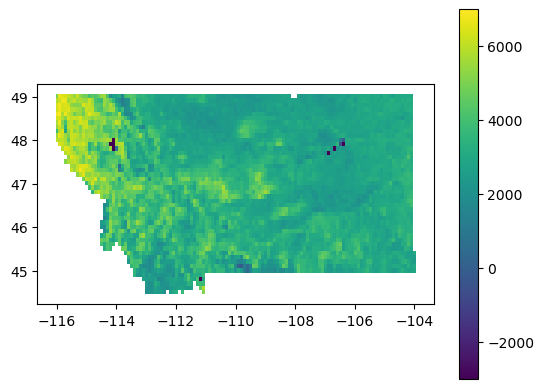

In [72]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np
clipped_ndvi = clipped_ndvi.to_crs(4269)
# Step 1: Create a grid overlay
minx, miny, maxx, maxy = clipped_ndvi.total_bounds
grid_size = 0.1  # Adjust as needed for grid cell size

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=clipped_ndvi.crs)

# Step 2: Spatially join NDVI points to grid cells
ndvi_with_grid = gpd.sjoin(clipped_ndvi, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate NDVI values per grid cell (mean, max, etc.)
aggregated_ndvi = ndvi_with_grid.groupby('index_right').agg({
    'ndvi': np.mean,  # Change aggregation as needed (e.g., np.max, np.min)
}).reset_index()

# Step 4: Merge with the grid to retain grid geometries
aggregated_ndvi_gdf = grid_gdf.merge(aggregated_ndvi, left_index=True, right_on='index_right')

aggregated_ndvi_gdf = aggregated_ndvi_gdf.to_crs(4269)

# Step 5: Plot or save the result
aggregated_ndvi_gdf.plot(column='ndvi', legend=True)


In [73]:
print(len(grid_cells))

print(type(aggregated_ndvi_gdf))
aggregated_ndvi_gdf

5566
<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry,index_right,ndvi
0,"POLYGON ((-115.94167 47.95833, -115.94167 48.0...",35.0,5995.819444
1,"POLYGON ((-115.94167 48.05833, -115.94167 48.1...",36.0,5585.208333
2,"POLYGON ((-115.94167 48.15833, -115.94167 48.2...",37.0,3844.375000
3,"POLYGON ((-115.94167 48.25833, -115.94167 48.3...",38.0,5410.729167
4,"POLYGON ((-115.94167 48.35833, -115.94167 48.4...",39.0,5704.750000
...,...,...,...
4611,"POLYGON ((-103.94167 44.95833, -103.94167 45.0...",5525.0,2919.666667
4612,"POLYGON ((-103.94167 45.05833, -103.94167 45.1...",5526.0,2985.625000
4613,"POLYGON ((-103.94167 45.15833, -103.94167 45.2...",5527.0,2476.333333
4614,"POLYGON ((-103.94167 45.25833, -103.94167 45.3...",5528.0,2586.166667


In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# Step 1: Create grid cells
cell_data = []
cell_id = 1  # Initialize cell ID
grid_size = 0.1  # Grid size in degrees or CRS units

x = minx
while x < maxx:
    y = miny
    while y < maxy:
        cell_geom = box(x, y, x + grid_size, y + grid_size)  # Create a rectangle for each grid cell
        cell_data.append({'cell_id': cell_id, 'geometry': cell_geom})
        cell_id += 1
        y += grid_size
    x += grid_size




In [39]:
# Step 2: Create grid GeoDataFrame
ndvi_grid_gdf = gpd.GeoDataFrame(cell_data, crs=montana_gdf.crs)

# Step 3: Initialize list to store average NDVI values for each cell
average_ndvi_list = []

# Step 4: Loop through each grid cell and calculate the average NDVI
for _, row in ndvi_grid_gdf.iterrows():
    # Get the geometry of the current grid cell
    cell_geom = row['geometry']
    
    # Find all NDVI points that fall within the current cell
    points_within_cell = clipped_ndvi[clipped_ndvi.geometry.within(cell_geom)]
    
    # If there are points within the cell, calculate the average NDVI
    if not points_within_cell.empty:
        average_ndvi = points_within_cell['ndvi'].mean()
    else:
        average_ndvi = None  # No points in the grid cell
    
    # Append the average NDVI to the list
    average_ndvi_list.append(average_ndvi)


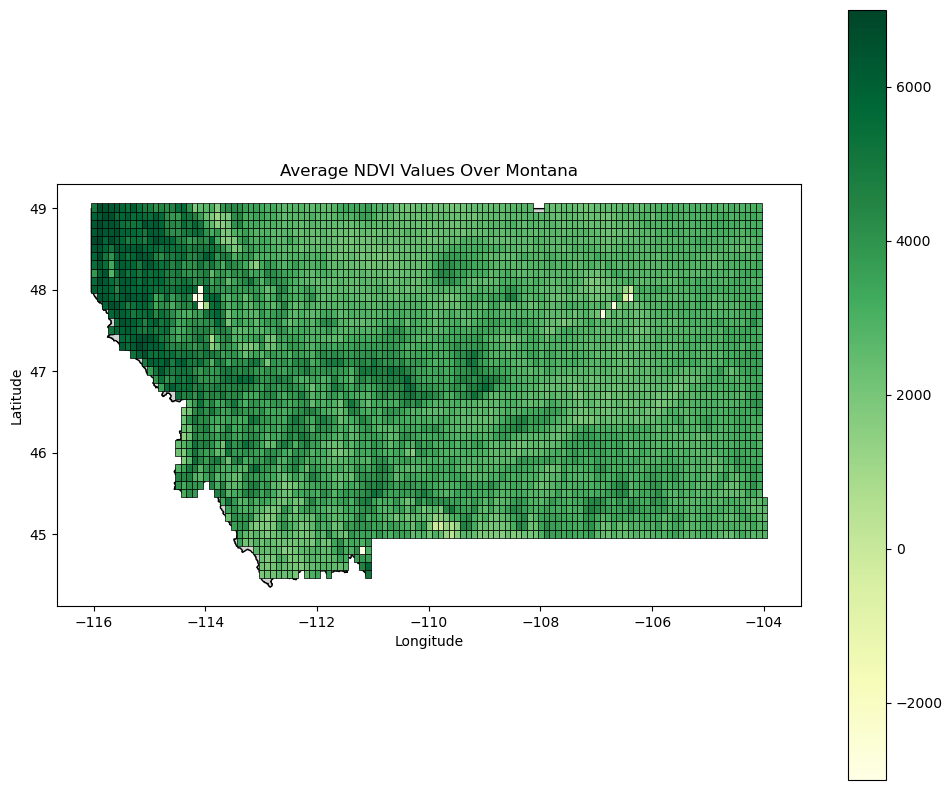

In [40]:
# Step 5: Add the average NDVI values as a new column in grid_gdf
ndvi_grid_gdf['average_ndvi'] = average_ndvi_list

# Step 6: Plot the result
fig, ax = plt.subplots(figsize=(12, 10))
montana_gdf.plot(ax=ax, color='lightgray', edgecolor='black')  # Plot Montana's boundary
ndvi_grid_gdf.plot(ax=ax, column='average_ndvi', cmap='YlGn', linewidth=0.5, edgecolor='black', legend=True)
# Customizing the plot
plt.title('Average NDVI Values Over Montana')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [44]:
print(len(ndvi_grid_gdf))
ndvi_grid_gdf

5566


,cell_id,geometry,average_ndvi
0,1,"POLYGON ((-115.94167 44.45833, -115.94167 44.5...",NaN
1,2,"POLYGON ((-115.94167 44.55833, -115.94167 44.6...",NaN
2,3,"POLYGON ((-115.94167 44.65833, -115.94167 44.7...",NaN
3,4,"POLYGON ((-115.94167 44.75833, -115.94167 44.8...",NaN
4,5,"POLYGON ((-115.94167 44.85833, -115.94167 44.9...",NaN
...,...,...,...
5561,5562,"POLYGON ((-103.94167 48.55833, -103.94167 48.6...",NaN
5562,5563,"POLYGON ((-103.94167 48.65833, -103.94167 48.7...",NaN
5563,5564,"POLYGON ((-103.94167 48.75833, -103.94167 48.8...",NaN
5564,5565,"POLYGON ((-103.94167 48.85833, -103.94167 48.9...",NaN


In [54]:
non_nan_values = ndvi_grid_gdf['average_ndvi'].notna().any()
non_nan_values

True

In [67]:
aggregated_ndvi_gdf

,geometry,index_right,ndvi
0,"POLYGON ((-115.94167 47.95833, -115.94167 48.0...",35.0,5995.819444
1,"POLYGON ((-115.94167 48.05833, -115.94167 48.1...",36.0,5585.208333
2,"POLYGON ((-115.94167 48.15833, -115.94167 48.2...",37.0,3844.375000
3,"POLYGON ((-115.94167 48.25833, -115.94167 48.3...",38.0,5410.729167
4,"POLYGON ((-115.94167 48.35833, -115.94167 48.4...",39.0,5704.750000
...,...,...,...
4611,"POLYGON ((-103.94167 44.95833, -103.94167 45.0...",5525.0,2919.666667
4612,"POLYGON ((-103.94167 45.05833, -103.94167 45.1...",5526.0,2985.625000
4613,"POLYGON ((-103.94167 45.15833, -103.94167 45.2...",5527.0,2476.333333
4614,"POLYGON ((-103.94167 45.25833, -103.94167 45.3...",5528.0,2586.166667


In [ ]:
#error correction

Temp Index

In [45]:
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

#if i combine this immediately it blows up


#------------------------------------------------------------
#min
min_tif_path = 'data\\other\\annual_meanTemp_min.tif'

# Open the .tif file and read the data
with rasterio.open(min_tif_path) as min_src:
    min_data = min_src.read(1)  # Read the first band
    min_transform = min_src.transform

    # Get coordinates and pixel values
    min_rows, min_cols = np.where(min_data != min_src.nodata)  # Exclude nodata values
    min_pixel_values = min_data[min_rows, min_cols]

    # Convert pixel row/col to coordinates
    min_xs, min_ys = rasterio.transform.xy(min_transform, min_rows, min_cols)

# Create a DataFrame with coordinates and pixel values
min_df = pd.DataFrame({
    'min_x': min_xs,
    'min_y': min_ys,
    'min_temperature_kelvin': min_pixel_values,  # Change to minimum temperature in Kelvin
    'min_temperature_fahrenheit': (min_pixel_values - 273.15) * 9/5 + 32  # Convert to Fahrenheit
})

# Create a GeoDataFrame with the original CRS
min_gdf = gpd.GeoDataFrame(
    min_df,
    geometry=[Point(x, y) for x, y in zip(min_df['min_x'], min_df['min_y'])],
    crs=min_src.crs  # Use the coordinate reference system of the original file
)

print(min_gdf.head())
#----------------------------

print()

#max
max_tif_path = 'data\\other\\annual_meanTemp_max.tif'

# Open the .tif file and read the data
with rasterio.open(max_tif_path) as max_src:
    max_data = max_src.read(1)  # Read the first band
    max_transform = max_src.transform

    # Get coordinates and pixel values
    max_rows, max_cols = np.where(max_data != max_src.nodata)  # Exclude nodata values
    max_pixel_values = max_data[max_rows, max_cols]

    # Convert pixel row/col to coordinates
    max_xs, max_ys = rasterio.transform.xy(max_transform, max_rows, max_cols)

# Create a DataFrame with coordinates and pixel values
max_df = pd.DataFrame({
    'max_x': max_xs,
    'max_y': max_ys,
    'max_temperature_kelvin': max_pixel_values,  # Change to maximum temperature in Kelvin
    'max_temperature_fahrenheit': (max_pixel_values - 273.15) * 9/5 + 32  # Convert to Fahrenheit
})

# Create a GeoDataFrame with the original CRS
max_gdf = gpd.GeoDataFrame(
    max_df,
    geometry=[Point(x, y) for x, y in zip(max_df['max_x'], max_df['max_y'])],
    crs=max_src.crs  # Use the coordinate reference system of the original file
)

# Display the first few rows of the GeoDataFrame
print(max_gdf.head())


        min_x      min_y  min_temperature_kelvin  min_temperature_fahrenheit  \
0 -116.016667  48.983333              272.198547                   30.287395   
1 -115.975000  48.983333              271.584290                   29.181732   
2 -115.933333  48.983333              271.935883                   29.814600   
3 -115.891667  48.983333              272.142670                   30.186817   
4 -115.850000  48.983333              270.742920                   27.667267   

                      geometry  
0  POINT (-116.01667 48.98333)  
1  POINT (-115.97500 48.98333)  
2  POINT (-115.93333 48.98333)  
3  POINT (-115.89167 48.98333)  
4  POINT (-115.85000 48.98333)  

        max_x      max_y  max_temperature_kelvin  max_temperature_fahrenheit  \
0 -116.016667  48.983333              282.098541                   48.107384   
1 -115.975000  48.983333              279.577393                   43.569317   
2 -115.933333  48.983333              280.153595                   44.606483   


                      geometry  average_temperature_fahrenheit
0  POINT (-116.01667 48.98334)                       39.197388
1  POINT (-115.97500 48.98334)                       36.375526
2  POINT (-115.93333 48.98334)                       37.210541
3  POINT (-115.89167 48.98334)                       38.685455
4  POINT (-115.85000 48.98334)                       38.966595


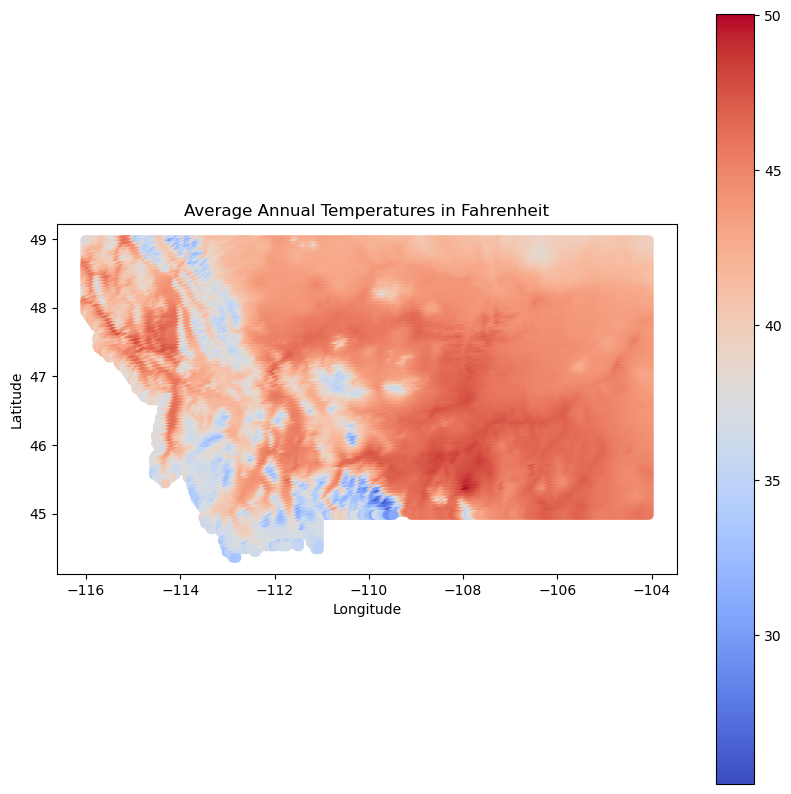

In [46]:
tempCombined_gdf = min_gdf.merge(max_gdf, on="geometry", suffixes=("_min", "_max"))
tempCombined_gdf['average_temperature_fahrenheit'] = (tempCombined_gdf['min_temperature_fahrenheit'] + tempCombined_gdf['max_temperature_fahrenheit']) / 2

tempCombined_gdf = tempCombined_gdf.to_crs(4269)


print(tempCombined_gdf[['geometry', 'average_temperature_fahrenheit']].head())

fig, ax = plt.subplots(figsize=(10, 10))
tempCombined_gdf.plot(column='average_temperature_fahrenheit', cmap='coolwarm', legend=True, ax=ax)
plt.title('Average Annual Temperatures in Fahrenheit')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [47]:
print(tempCombined_gdf.crs)
tempCombined_gdf = tempCombined_gdf.to_crs(4269)
print(tempCombined_gdf.crs)

EPSG:4269
EPSG:4269


C:\Users\Alex\AppData\Local\Temp\ipykernel_36352\2568643143.py:25: FutureWarning: The provided callable <function mean at 0x0000024AC5A62050> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_temp = temp_with_grid.groupby('index_right').agg({


<Axes: >

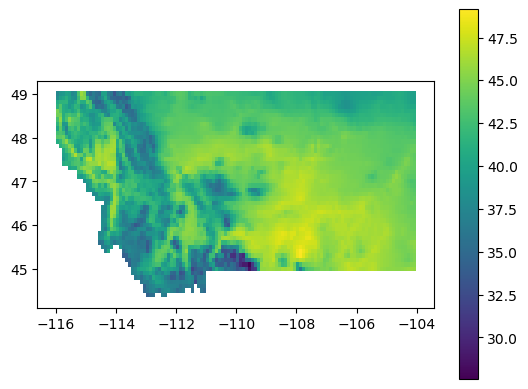

In [48]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np

# Step 1: Create a grid overlay based on the bounds of tempCombined_gdf
minx, miny, maxx, maxy = tempCombined_gdf.total_bounds
grid_size = 0.1  # Adjust this size based on your needs (in degrees or CRS units)

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=tempCombined_gdf.crs)

# Step 2: Perform a spatial join to associate temperature points with grid cells
temp_with_grid = gpd.sjoin(tempCombined_gdf, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate the temperature data for each grid cell (e.g., average temperature)
aggregated_temp = temp_with_grid.groupby('index_right').agg({
    'average_temperature_fahrenheit': np.mean,  # You can use np.max, np.min, etc., as needed
}).reset_index()

# Step 4: Merge the aggregated data with the grid to retain grid geometries
aggregated_temp_gdf = grid_gdf.merge(aggregated_temp, left_index=True, right_on='index_right')

aggregated_temp_gdf = aggregated_temp_gdf.to_crs(4269)

# Step 5: Plot or save the result
aggregated_temp_gdf.plot(column='average_temperature_fahrenheit', legend=True)


C:\Users\Alex\AppData\Local\Temp\ipykernel_36352\985934290.py:27: FutureWarning: The provided callable <function mean at 0x0000024AC5A62050> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_temp = temp_with_grid.groupby('index_right').agg({


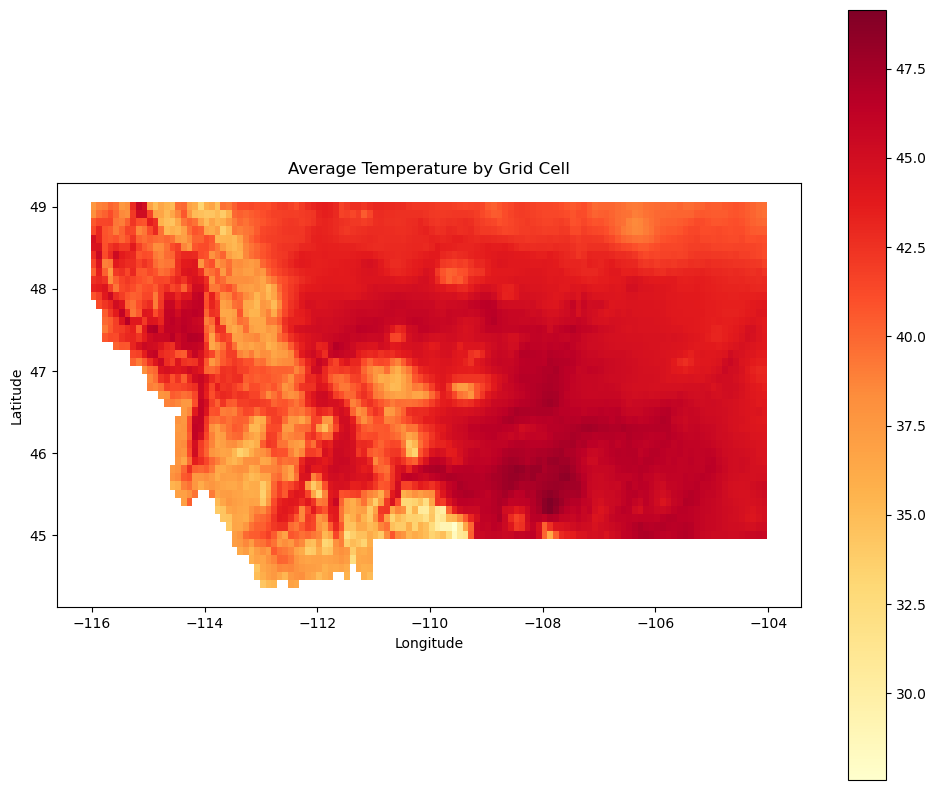

In [49]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a grid overlay based on the bounds of tempCombined_gdf
minx, miny, maxx, maxy = tempCombined_gdf.total_bounds
grid_size = 0.1  # Adjust this size based on your needs (in degrees or CRS units)

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

# Create GeoDataFrame for grid cells
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=tempCombined_gdf.crs)

# Step 2: Perform a spatial join to associate temperature points with grid cells
temp_with_grid = gpd.sjoin(tempCombined_gdf, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate the temperature data for each grid cell (e.g., average temperature)
aggregated_temp = temp_with_grid.groupby('index_right').agg({
    'average_temperature_fahrenheit': np.mean,  # Use np.mean or other aggregation as needed
}).reset_index()

# Step 4: Merge the aggregated data with the grid to retain grid geometries
aggregated_temp_gdf = grid_gdf.merge(aggregated_temp, left_index=True, right_on='index_right')

# Step 5: Convert CRS to a desired projection (if necessary)
aggregated_temp_gdf = aggregated_temp_gdf.to_crs(4269)

# Step 6: Plot the result
fig, ax = plt.subplots(figsize=(12, 10))
aggregated_temp_gdf.plot(column='average_temperature_fahrenheit', cmap='YlOrRd', ax=ax, legend=True)

# Customize the plot
plt.title('Average Temperature by Grid Cell')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [50]:
print(len(grid_cells))

print(type(aggregated_temp_gdf))
aggregated_temp_gdf

5640
<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry,index_right,average_temperature_fahrenheit
0,"POLYGON ((-115.91667 44.35833, -115.91667 44.4...",0.0,NaN
1,"POLYGON ((-115.91667 44.45833, -115.91667 44.5...",1.0,NaN
2,"POLYGON ((-115.91667 44.55833, -115.91667 44.6...",2.0,NaN
3,"POLYGON ((-115.91667 44.65833, -115.91667 44.7...",3.0,NaN
4,"POLYGON ((-115.91667 44.75833, -115.91667 44.8...",4.0,NaN
...,...,...,...
5635,"POLYGON ((-104.01667 48.55833, -104.01667 48.6...",5635.0,41.123627
5636,"POLYGON ((-104.01667 48.65833, -104.01667 48.7...",5636.0,40.464432
5637,"POLYGON ((-104.01667 48.75833, -104.01667 48.8...",5637.0,39.920071
5638,"POLYGON ((-104.01667 48.85833, -104.01667 48.9...",5638.0,39.606617


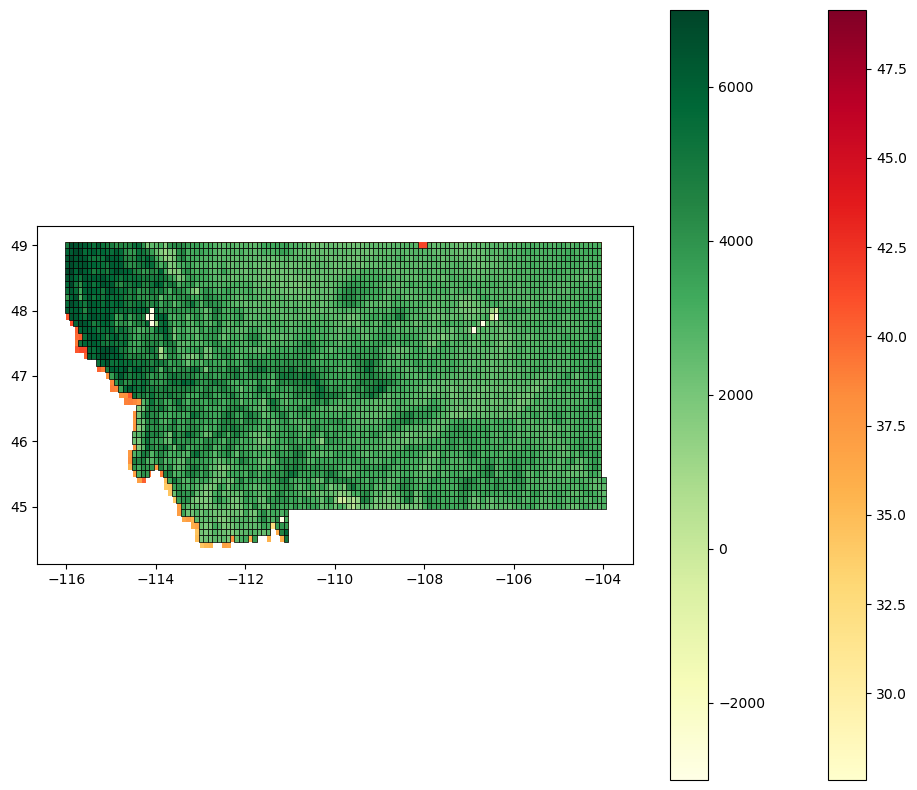

In [51]:
fig, ax = plt.subplots(figsize=(12, 10))

aggregated_temp_gdf.plot(column='average_temperature_fahrenheit', cmap='YlOrRd', ax=ax, legend=True)
ndvi_grid_gdf.plot(ax=ax, column='average_ndvi', cmap='YlGn', linewidth=0.5, edgecolor='black', legend=True)


plt.show()

Rainfall Index

<Figure size 1000x1000 with 0 Axes>

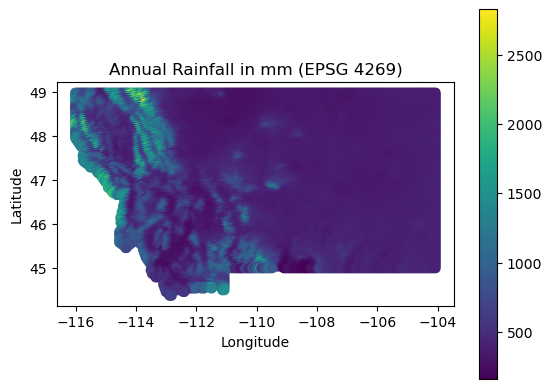

In [65]:
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Replace 'your_file.tif' with the path to your .tif file
tif_path = 'data\\other\\annual_meanrain.tif'

# Open the .tif file and read the data
with rasterio.open(tif_path) as rain_src:
    rain_data = rain_src.read(1)  # Read the first band
    rain_transform = rain_src.transform

    # Get coordinates and pixel values
    rain_rows, rain_cols = np.where(rain_data != rain_src.nodata)  # Exclude nodata values
    rain_pixel_values = rain_data[rain_rows, rain_cols]

    # Convert pixel row/col to coordinates
    rain_xs, rain_ys = rasterio.transform.xy(rain_transform, rain_rows, rain_cols)

# Create a DataFrame with coordinates and pixel values
rain_df = pd.DataFrame({
    'rain_x': rain_xs,
    'rain_y': rain_ys,
    'annual_rain_mm': rain_pixel_values  # Change to annual rain in mm
})

# Create a GeoDataFrame with the original CRS
rain_gdf = gpd.GeoDataFrame(
    rain_df,
    geometry=[Point(x, y) for x, y in zip(rain_df['rain_x'], rain_df['rain_y'])],
    crs=rain_src.crs  # Use the coordinate reference system of the original file
)

# Convert the GeoDataFrame to EPSG 4269 (NAD83)
rain_gdf_4269 = rain_gdf.to_crs(epsg=4269)

# Plot the GeoDataFrame
plt.figure(figsize=(10, 10))
rain_gdf_4269.plot(column='annual_rain_mm', cmap='viridis', legend=True)  # Using a suitable colormap for rain
plt.title('Annual Rainfall in mm (EPSG 4269)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_36352\2575990004.py:26: FutureWarning: The provided callable <function mean at 0x0000024AC5A62050> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_rain = rain_with_grid.groupby('index_right').agg({


<Axes: >

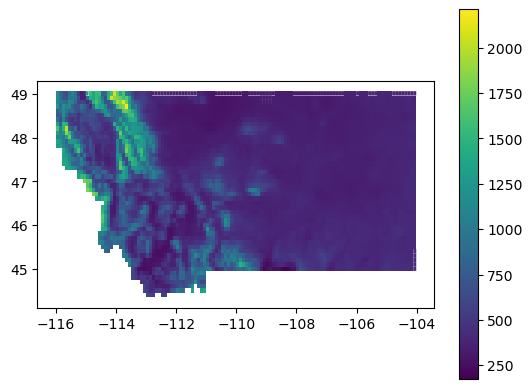

In [66]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np

# Assuming your rainfall data is in a GeoDataFrame called rain_gdf
# Step 1: Create a grid overlay based on the bounds of rain_gdf
minx, miny, maxx, maxy = rain_gdf.total_bounds
grid_size = 0.1  # Adjust the size based on your needs (e.g., degrees or CRS units)

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=rain_gdf.crs)

# Step 2: Perform a spatial join to associate rainfall points with grid cells
rain_with_grid = gpd.sjoin(rain_gdf, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate the rainfall data for each grid cell (e.g., average rainfall)
aggregated_rain = rain_with_grid.groupby('index_right').agg({
    'annual_rain_mm': np.mean,  # You can change to np.max, np.min, etc., if needed
}).reset_index()

# Step 4: Merge the aggregated data with the grid to retain grid geometries
aggregated_rain_gdf = grid_gdf.merge(aggregated_rain, left_index=True, right_on='index_right')

aggregated_rain_gdf = aggregated_rain_gdf.to_crs(4269)

# Step 5: Plot or save the result
aggregated_rain_gdf.plot(column='annual_rain_mm', legend=True)





In [ ]:
print(len(grid_cells))

print(aggregated_rain_gdf.crs)
aggregated_rain_gdf


5640
EPSG:4269


,geometry,index_right,annual_rain_mm
0,"POLYGON ((-115.91667 44.35833, -115.91667 44.4...",0.0,NaN
1,"POLYGON ((-115.91667 44.45833, -115.91667 44.5...",1.0,NaN
2,"POLYGON ((-115.91667 44.55833, -115.91667 44.6...",2.0,NaN
3,"POLYGON ((-115.91667 44.65833, -115.91667 44.7...",3.0,NaN
4,"POLYGON ((-115.91667 44.75833, -115.91667 44.8...",4.0,NaN
...,...,...,...
5635,"POLYGON ((-104.01667 48.55833, -104.01667 48.6...",5635.0,389.281647
5636,"POLYGON ((-104.01667 48.65833, -104.01667 48.7...",5636.0,386.425018
5637,"POLYGON ((-104.01667 48.75833, -104.01667 48.8...",5637.0,373.666107
5638,"POLYGON ((-104.01667 48.85833, -104.01667 48.9...",5638.0,372.281677


temp


C:\Users\Alex\AppData\Local\Temp\ipykernel_36352\1612598518.py:25: FutureWarning: The provided callable <function mean at 0x0000024AC5A62050> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_ndvi = ndvi_with_grid.groupby('index_right').agg({


<Axes: >

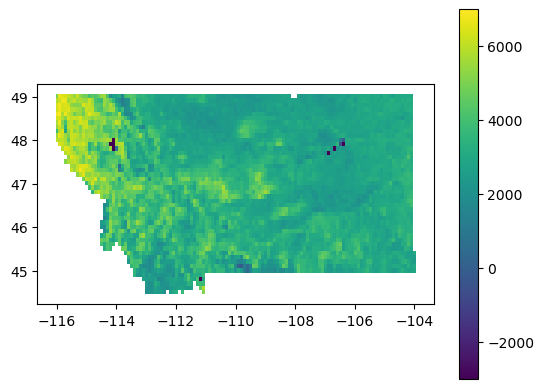

In [77]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np
clipped_ndvi = clipped_ndvi.to_crs(4269)
# Step 1: Create a grid overlay
minx, miny, maxx, maxy = clipped_ndvi.total_bounds
grid_size = 0.1  # Adjust as needed for grid cell size

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=clipped_ndvi.crs)

# Step 2: Spatially join NDVI points to grid cells
ndvi_with_grid = gpd.sjoin(clipped_ndvi, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate NDVI values per grid cell (mean, max, etc.)
aggregated_ndvi = ndvi_with_grid.groupby('index_right').agg({
    'ndvi': np.mean,  # Change aggregation as needed (e.g., np.max, np.min)
}).reset_index()

# Step 4: Merge with the grid to retain grid geometries
aggregated_ndvi_gdf = grid_gdf.merge(aggregated_ndvi, left_index=True, right_on='index_right')

aggregated_ndvi_gdf = aggregated_ndvi_gdf.to_crs(4269)

# Step 5: Plot or save the result
aggregated_ndvi_gdf.plot(column='ndvi', legend=True)


In [63]:
aggregated_temp_gdf

,geometry,index_right,average_temperature_fahrenheit
0,"POLYGON ((-115.91667 44.35833, -115.91667 44.4...",0.0,NaN
1,"POLYGON ((-115.91667 44.45833, -115.91667 44.5...",1.0,NaN
2,"POLYGON ((-115.91667 44.55833, -115.91667 44.6...",2.0,NaN
3,"POLYGON ((-115.91667 44.65833, -115.91667 44.7...",3.0,NaN
4,"POLYGON ((-115.91667 44.75833, -115.91667 44.8...",4.0,NaN
...,...,...,...
5635,"POLYGON ((-104.01667 48.55833, -104.01667 48.6...",5635.0,41.123627
5636,"POLYGON ((-104.01667 48.65833, -104.01667 48.7...",5636.0,40.464432
5637,"POLYGON ((-104.01667 48.75833, -104.01667 48.8...",5637.0,39.920071
5638,"POLYGON ((-104.01667 48.85833, -104.01667 48.9...",5638.0,39.606617


In [68]:
aggregated_rain_gdf

,geometry,index_right,annual_rain_mm
0,"POLYGON ((-115.91667 44.35833, -115.91667 44.4...",0.0,NaN
1,"POLYGON ((-115.91667 44.45833, -115.91667 44.5...",1.0,NaN
2,"POLYGON ((-115.91667 44.55833, -115.91667 44.6...",2.0,NaN
3,"POLYGON ((-115.91667 44.65833, -115.91667 44.7...",3.0,NaN
4,"POLYGON ((-115.91667 44.75833, -115.91667 44.8...",4.0,NaN
...,...,...,...
5635,"POLYGON ((-104.01667 48.55833, -104.01667 48.6...",5635.0,389.281647
5636,"POLYGON ((-104.01667 48.65833, -104.01667 48.7...",5636.0,386.425018
5637,"POLYGON ((-104.01667 48.75833, -104.01667 48.8...",5637.0,373.666107
5638,"POLYGON ((-104.01667 48.85833, -104.01667 48.9...",5638.0,372.281677


In [76]:
aggregated_ndvi_gdf

,geometry,index_right,ndvi
0,"POLYGON ((-115.94167 47.95833, -115.94167 48.0...",35.0,5995.819444
1,"POLYGON ((-115.94167 48.05833, -115.94167 48.1...",36.0,5585.208333
2,"POLYGON ((-115.94167 48.15833, -115.94167 48.2...",37.0,3844.375000
3,"POLYGON ((-115.94167 48.25833, -115.94167 48.3...",38.0,5410.729167
4,"POLYGON ((-115.94167 48.35833, -115.94167 48.4...",39.0,5704.750000
...,...,...,...
4611,"POLYGON ((-103.94167 44.95833, -103.94167 45.0...",5525.0,2919.666667
4612,"POLYGON ((-103.94167 45.05833, -103.94167 45.1...",5526.0,2985.625000
4613,"POLYGON ((-103.94167 45.15833, -103.94167 45.2...",5527.0,2476.333333
4614,"POLYGON ((-103.94167 45.25833, -103.94167 45.3...",5528.0,2586.166667


Average NDVI: 3285.8198303304926


<Axes: >

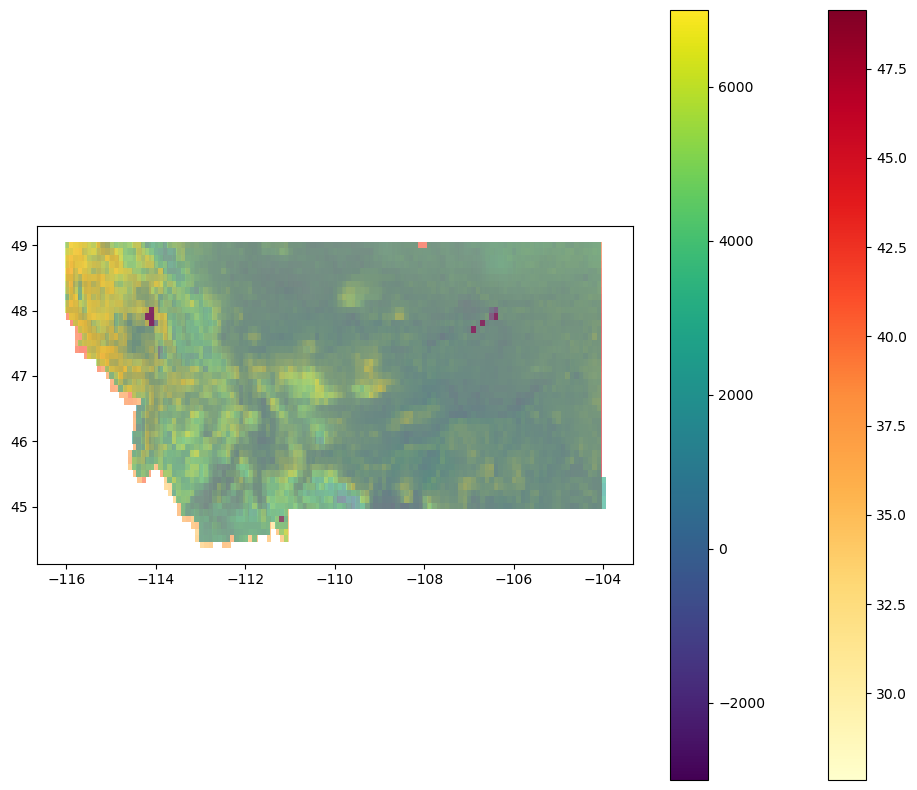

In [84]:
ig, ax = plt.subplots(figsize=(12, 10))

# Plot the temperature GeoDataFrame
aggregated_temp_gdf.plot(column='average_temperature_fahrenheit', cmap='YlOrRd', ax=ax, legend=True, alpha=0.6)

# Plot the NDVI GeoDataFrame
aggregated_ndvi_gdf.plot(column='ndvi', ax=ax, legend=True, alpha=0.6)
# rain_gdf_4269.plot(column='annual_rain_mm', cmap='blues', legend=True)

In [75]:
print(aggregated_ndvi_gdf.index)
# aggregated_ndvi_gdf = aggregated_ndvi_gdf.drop(index=range(5540, 5567))


RangeIndex(start=0, stop=4616, step=1)


Data merging

In [ ]:
aggregated_rain_gdf = aggregated_rain_gdf.to_crs(epsg=4269)
aggregated_temp_gdf = aggregated_temp_gdf.to_crs(epsg=4269)

print("Rain CRS:", aggregated_rain_gdf.crs)
print("Temp CRS:", aggregated_temp_gdf.crs)
print("NDVI CRS:", aggregated_ndvi_gdf.crs)


Rain CRS: EPSG:4269
Temp CRS: EPSG:4269
NDVI CRS: EPSG:4269


In [ ]:
total_gdf = gpd.GeoDataFrame(pd.concat([aggregated_rain_gdf, aggregated_temp_gdf, aggregated_ndvi_gdf], ignore_index=True))
total_gdf

,geometry,index_right,annual_rain_mm,average_temperature_fahrenheit,ndvi
0,"POLYGON ((-115.91667 44.35833, -115.91667 44.4...",0.0,NaN,NaN,NaN
1,"POLYGON ((-115.91667 44.45833, -115.91667 44.5...",1.0,NaN,NaN,NaN
2,"POLYGON ((-115.91667 44.55833, -115.91667 44.6...",2.0,NaN,NaN,NaN
3,"POLYGON ((-115.91667 44.65833, -115.91667 44.7...",3.0,NaN,NaN,NaN
4,"POLYGON ((-115.91667 44.75833, -115.91667 44.8...",4.0,NaN,NaN,NaN
...,...,...,...,...,...
15891,"POLYGON ((-103.94167 44.95833, -103.94167 45.0...",5525.0,NaN,NaN,2919.666667
15892,"POLYGON ((-103.94167 45.05833, -103.94167 45.1...",5526.0,NaN,NaN,2985.625000
15893,"POLYGON ((-103.94167 45.15833, -103.94167 45.2...",5527.0,NaN,NaN,2476.333333
15894,"POLYGON ((-103.94167 45.25833, -103.94167 45.3...",5528.0,NaN,NaN,2586.166667


In [98]:
# Merge aggregated_ndvi_gdf and aggregated_temp_gdf on their indices
merged_gdf = aggregated_ndvi_gdf.merge(aggregated_temp_gdf, left_index=True, right_index=True, how='inner')

# Merge the result with the second aggregated_ndvi_gdf on their indices
merged_gdf = merged_gdf.merge(aggregated_ndvi_gdf, left_index=True, right_index=True, how='inner')

# Verify the result
print(merged_gdf.head())



                                          geometry_x  index_right_x  \
0  POLYGON ((-115.94167 47.95833, -115.94167 48.0...           35.0   
1  POLYGON ((-115.94167 48.05833, -115.94167 48.1...           36.0   
2  POLYGON ((-115.94167 48.15833, -115.94167 48.2...           37.0   
3  POLYGON ((-115.94167 48.25833, -115.94167 48.3...           38.0   
4  POLYGON ((-115.94167 48.35833, -115.94167 48.4...           39.0   

        ndvi_x                                         geometry_y  \
0  5995.819444  POLYGON ((-115.91667 44.35833, -115.91667 44.4...   
1  5585.208333  POLYGON ((-115.91667 44.45833, -115.91667 44.5...   
2  3844.375000  POLYGON ((-115.91667 44.55833, -115.91667 44.6...   
3  5410.729167  POLYGON ((-115.91667 44.65833, -115.91667 44.7...   
4  5704.750000  POLYGON ((-115.91667 44.75833, -115.91667 44.8...   

   index_right_y  average_temperature_fahrenheit  \
0            0.0                             NaN   
1            1.0                             NaN   
2 

In [101]:
# Drop the unnecessary columns
merged_gdf = merged_gdf.drop(columns=['index_right_y', 'index_right_y', 'ndvi_y', 'ndvi_y'])

# Ensure the correct geometry column is used
merged_gdf = merged_gdf.set_geometry('geometry')

# Optional: Handle missing values (fill NaNs or drop rows)
# For example, you can fill NaNs in the 'average_temperature_fahrenheit' column with a default value:
merged_gdf['average_temperature_fahrenheit'] = merged_gdf['average_temperature_fahrenheit'].fillna(0)

# Or you can drop rows with missing values:
# merged_gdf = merged_gdf.dropna(subset=['average_temperature_fahrenheit'])

# Verify the cleaned-up GeoDataFrame
print(merged_gdf.head())



                                          geometry_x  index_right_x  \
0  POLYGON ((-115.94167 47.95833, -115.94167 48.0...           35.0   
1  POLYGON ((-115.94167 48.05833, -115.94167 48.1...           36.0   
2  POLYGON ((-115.94167 48.15833, -115.94167 48.2...           37.0   
3  POLYGON ((-115.94167 48.25833, -115.94167 48.3...           38.0   
4  POLYGON ((-115.94167 48.35833, -115.94167 48.4...           39.0   

        ndvi_x                                         geometry_y  \
0  5995.819444  POLYGON ((-115.91667 44.35833, -115.91667 44.4...   
1  5585.208333  POLYGON ((-115.91667 44.45833, -115.91667 44.5...   
2  3844.375000  POLYGON ((-115.91667 44.55833, -115.91667 44.6...   
3  5410.729167  POLYGON ((-115.91667 44.65833, -115.91667 44.7...   
4  5704.750000  POLYGON ((-115.91667 44.75833, -115.91667 44.8...   

   average_temperature_fahrenheit  \
0                             0.0   
1                             0.0   
2                             0.0   
3         

In [102]:
merged_gdf

,geometry_x,index_right_x,ndvi_x,geometry_y,average_temperature_fahrenheit,geometry,index_right
0,"POLYGON ((-115.94167 47.95833, -115.94167 48.0...",35.0,5995.819444,"POLYGON ((-115.91667 44.35833, -115.91667 44.4...",0.000000,"POLYGON ((-115.94167 47.95833, -115.94167 48.0...",35.0
1,"POLYGON ((-115.94167 48.05833, -115.94167 48.1...",36.0,5585.208333,"POLYGON ((-115.91667 44.45833, -115.91667 44.5...",0.000000,"POLYGON ((-115.94167 48.05833, -115.94167 48.1...",36.0
2,"POLYGON ((-115.94167 48.15833, -115.94167 48.2...",37.0,3844.375000,"POLYGON ((-115.91667 44.55833, -115.91667 44.6...",0.000000,"POLYGON ((-115.94167 48.15833, -115.94167 48.2...",37.0
3,"POLYGON ((-115.94167 48.25833, -115.94167 48.3...",38.0,5410.729167,"POLYGON ((-115.91667 44.65833, -115.91667 44.7...",0.000000,"POLYGON ((-115.94167 48.25833, -115.94167 48.3...",38.0
4,"POLYGON ((-115.94167 48.35833, -115.94167 48.4...",39.0,5704.750000,"POLYGON ((-115.91667 44.75833, -115.91667 44.8...",0.000000,"POLYGON ((-115.94167 48.35833, -115.94167 48.4...",39.0
...,...,...,...,...,...,...,...
4611,"POLYGON ((-103.94167 44.95833, -103.94167 45.0...",5525.0,2919.666667,"POLYGON ((-106.11667 44.85833, -106.11667 44.9...",0.000000,"POLYGON ((-103.94167 44.95833, -103.94167 45.0...",5525.0
4612,"POLYGON ((-103.94167 45.05833, -103.94167 45.1...",5526.0,2985.625000,"POLYGON ((-106.11667 44.95833, -106.11667 45.0...",47.096786,"POLYGON ((-103.94167 45.05833, -103.94167 45.1...",5526.0
4613,"POLYGON ((-103.94167 45.15833, -103.94167 45.2...",5527.0,2476.333333,"POLYGON ((-106.11667 45.05833, -106.11667 45.1...",46.756439,"POLYGON ((-103.94167 45.15833, -103.94167 45.2...",5527.0
4614,"POLYGON ((-103.94167 45.25833, -103.94167 45.3...",5528.0,2586.166667,"POLYGON ((-106.11667 45.15833, -106.11667 45.2...",46.251282,"POLYGON ((-103.94167 45.25833, -103.94167 45.3...",5528.0


Random Forest

In [104]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [106]:
# Step 1: Prepare the data (remove geometry and keep numeric features)
gdf_clean = merged_gdf.drop(columns=['geometry_x', 'geometry_y', 'geometry'])

In [107]:
# Step 2: Define the target and features
X = gdf_clean.drop(columns=['average_temperature_fahrenheit'])
y = gdf_clean['average_temperature_fahrenheit']

In [108]:
# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Step 4: Train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [118]:
# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [119]:
# Step 6: Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 122.20942111849743


In [120]:
# Step 7: Add predicted values back to the GeoDataFrame
# We need to merge predictions with the GeoDataFrame
gdf_test = X_test.copy()
gdf_test['predicted_temperature'] = y_pred
gdf_test['geometry'] = merged_gdf.loc[gdf_test.index, 'geometry_x']  # Assuming geometry_x is the original geometry

In [122]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf_test contains both geometry and predicted_temperature
# Check the geometry column explicitly
gdf_test.set_geometry('geometry', inplace=True)

# Make sure the predicted temperature column exists and contains valid values
print(gdf_test[['predicted_temperature', 'geometry']].head())

# Step 8: Plotting the predictions on the map (spatial visualization)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame with valid geometries and predicted temperatures
gdf_test.plot(column='predicted_temperature', ax=ax, legend=True, cmap='coolwarm')

# Add title and labels
ax.set_title('Predicted Temperature Map', fontsize=16)

# Add the legend with a customized label
legend = ax.get_legend()
legend.set_title("Predicted Temperature (°F)")

# Show the plot
plt.show()


ValueError: Can't do inplace setting when converting from DataFrame to GeoDataFrame